In [37]:
import pandas as pd
import random
import time

traits = {
    'MP:0004738': None,  
    'MP:0002638': None,  
    'MP:0000376': None,
    'MP:0003449': None,
    'MP:0000410': None,
    'MP:0000923': None,
    'MP:0001713': None,
    'MP:0002276': None,
    'MP:0001191': None,
    'MP:0000130': None
}

fitness_df = pd.read_csv('fitness.csv')
for index, row in fitness_df.iterrows():
    mp_id = row['id']
    fitness_score = row['fitness_score']
    if mp_id in traits:
        traits[mp_id] = fitness_score
        
        
class Rat:
    id_counter = 1
    
    def __init__(self, genome=None, parent1=None, parent2=None):
        self.genome = genome if genome else random.sample(list(traits.keys()), 10)
        self.parent1 = parent1
        self.parent2 = parent2
        self.id = Rat.unique_id() 
        
    @classmethod
    def unique_id(cls):
        current_id = cls.id_counter
        cls.id_counter += 1  # Increment the ID counter
        return current_id

    def fitness(self):
        return sum(traits[trait] for trait in self.genome if traits[trait] is not None) / len(self.genome)
    
random.seed(42)
num_rats = 5
population = [Rat() for _ in range(num_rats)]

for i, rat in enumerate(population, 1):
    print(f"Rat {i}: Genome: {rat.genome}, Fitness: {rat.fitness():.2f}")


Rat 1: Genome: ['MP:0002638', 'MP:0004738', 'MP:0000410', 'MP:0000130', 'MP:0001713', 'MP:0000923', 'MP:0001191', 'MP:0000376', 'MP:0003449', 'MP:0002276'], Fitness: -3.20
Rat 2: Genome: ['MP:0004738', 'MP:0000130', 'MP:0002638', 'MP:0002276', 'MP:0001713', 'MP:0000410', 'MP:0001191', 'MP:0000376', 'MP:0003449', 'MP:0000923'], Fitness: -3.20
Rat 3: Genome: ['MP:0003449', 'MP:0002276', 'MP:0000410', 'MP:0001713', 'MP:0004738', 'MP:0002638', 'MP:0000130', 'MP:0001191', 'MP:0000376', 'MP:0000923'], Fitness: -3.20
Rat 4: Genome: ['MP:0003449', 'MP:0000923', 'MP:0002638', 'MP:0004738', 'MP:0000130', 'MP:0001713', 'MP:0000376', 'MP:0002276', 'MP:0001191', 'MP:0000410'], Fitness: -3.20
Rat 5: Genome: ['MP:0002276', 'MP:0001191', 'MP:0002638', 'MP:0003449', 'MP:0004738', 'MP:0000410', 'MP:0000376', 'MP:0001713', 'MP:0000130', 'MP:0000923'], Fitness: -3.20


In [38]:
def generate_newick_mapping_with_fitness(population, newick_map):
    for rat in population:
        if rat.parent1 is None or rat.parent2 is None:
            newick_map[rat.id] = f"{rat.id}:{rat.fitness()}"  # Use rat's ID and fitness for initial generation
        else:
            # Fetch or default to parent IDs if Newick strings are not available
            parent1_newick = newick_map.get(rat.parent1.id, f"{rat.parent1.id}:{rat.parent1.fitness()}")
            parent2_newick = newick_map.get(rat.parent2.id, f"{rat.parent2.id}:{rat.parent2.fitness()}")
            newick_map[rat.id] = f"({parent1_newick},{parent2_newick}):{rat.fitness()}"
    return newick_map

# Initialize an empty Newick map
newick_map = {}


def mate(rat1, rat2):
    child_genome = rat1.genome[:5] + rat2.genome[5:]
    if random.random() < mutation_rate:
        child_genome[random.randint(0, 9)] = random.choice(list(traits.keys()))
    return Rat(genome=child_genome, parent1=rat1, parent2=rat2)

generations = 5
mutation_rate = 0.05 

for _ in range(generations):    
    population.sort(key=lambda rat: rat.fitness(), reverse=True)
    breeding_population = population[:num_rats // 2]

    next_generation = []
    while len(next_generation) < num_rats:
        parent1, parent2 = random.sample(breeding_population, 2)
        child = mate(parent1, parent2)
        next_generation.append(child)

    population = next_generation
    newick_map = generate_newick_mapping(population, newick_map)

average_fitness = sum(rat.fitness() for rat in population) / num_rats
print("Average fitness of final generation:", average_fitness)

final_generation_tree = newick_map[population[-1].id] + ";"

print(final_generation_tree)

Average fitness of final generation: -2.6
(((((1,2),(1,2)),((1,2),(1,2))),(((1,2),(1,2)),((1,2),(1,2)))),((((1,2),(1,2)),((1,2),(1,2))),(((1,2),(1,2)),((1,2),(1,2)))));


<Figure size 1000x600 with 0 Axes>

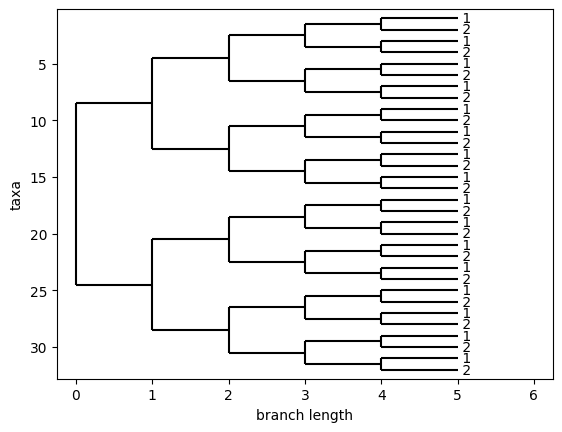

In [39]:
from Bio import Phylo
import matplotlib.pyplot as plt
import io

# Assuming final_generation_tree is your Newick string
newick_string = final_generation_tree

# Parse the Newick string
tree = Phylo.read(io.StringIO(newick_string), "newick")

# Optionally, set the width and height of the figure (adjust as needed)
plt.figure(figsize=(10, 6))

# Plot the tree with fitness scores included in node labels
Phylo.draw(tree, label_func=lambda x: x.name, do_show=False)

# Optionally, save the plot to a file
plt.savefig("tree_visualization.png")

# Show the plot
plt.show()


In [33]:
import random
import pandas as pd

# Define the traits and load fitness scores
traits = {
    'MP:0004738': None,
    'MP:0002638': None,
    'MP:0000376': None,
    'MP:0003449': None,
    'MP:0000410': None,
    'MP:0000923': None,
    'MP:0001713': None,
    'MP:0002276': None,
    'MP:0001191': None,
    'MP:0000130': None
}

fitness_df = pd.read_csv('fitness.csv')
for index, row in fitness_df.iterrows():
    mp_id = row['id']
    fitness_score = row['fitness_score']
    if mp_id in traits:
        traits[mp_id] = fitness_score

class Rat:
    id_counter = 1

    def __init__(self, genome=None, parent1=None, parent2=None):
        self.genome = genome if genome else random.sample(list(traits.keys()), 10)
        self.parent1 = parent1
        self.parent2 = parent2
        self.id = Rat.unique_id()

    @classmethod
    def unique_id(cls):
        current_id = cls.id_counter
        cls.id_counter += 1  # Increment the ID counter
        return current_id

    def fitness(self):
        return sum(traits[trait] for trait in self.genome if traits[trait] is not None) / len(self.genome)

# Create a list to store all rats' lineages
all_lineages = []

random.seed(42)
num_rats = 20
population = [Rat() for _ in range(num_rats)]

generations = 5
mutation_rate = 0.05

for generation in range(generations):
    population.sort(key=lambda rat: rat.fitness(), reverse=True)
    breeding_population = population[:num_rats // 2]

    # Create a list to store lineages for this generation
    generation_lineages = []

    for i in range(num_rats):
        parent1, parent2 = random.sample(breeding_population, 2)
        child = Rat(parent1=parent1, parent2=parent2)
        generation_lineages.append(str(child.id))  # Convert to string
        population.append(child)

    # Store the lineages of this generation in all_lineages
    all_lineages.append(generation_lineages)

# Create the Newick tree representation
def generate_newick_tree(lineages, generation):
    if len(lineages) == 1:
        return f"{lineages[0]}:{generation}"
    else:
        sub_trees = [generate_newick_tree([lineage], generation) for lineage in lineages]
        return f"({''.join(sub_trees)}):{generation}"

newick_trees = [generate_newick_tree(lineages, generation + 1) for generation, lineages in enumerate(all_lineages)]
final_newick_tree = ";".join(newick_trees)

print(final_newick_tree)


(21:122:123:124:125:126:127:128:129:130:131:132:133:134:135:136:137:138:139:140:1):1;(41:242:243:244:245:246:247:248:249:250:251:252:253:254:255:256:257:258:259:260:2):2;(61:362:363:364:365:366:367:368:369:370:371:372:373:374:375:376:377:378:379:380:3):3;(81:482:483:484:485:486:487:488:489:490:491:492:493:494:495:496:497:498:499:4100:4):4;(101:5102:5103:5104:5105:5106:5107:5108:5109:5110:5111:5112:5113:5114:5115:5116:5117:5118:5119:5120:5):5


In [34]:
from Bio import Phylo
import matplotlib.pyplot as plt
import io

# Assuming final_newick_tree is your Newick string
newick_string = final_newick_tree

# Parse the Newick string
tree = Phylo.read(io.StringIO(newick_string), "newick")

# Plot the tree
plt.figure(figsize=(10, 6))
Phylo.draw(tree, label_func=lambda x: x.name.split(":")[0], do_show=False)

# Optionally, save the plot to a file
plt.savefig("tree_visualization.png")

# Show the tree plot
plt.show()


NewickError: Text after semicolon in Newick tree: (